In [2]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Historical Trade Tweets/AaronBerry_Trans_1.csv"
csv_path2 = "../Player Historical Trade Tweets/AaronBerry_Trans_2.csv"
csv_path3 = "../Player Historical Trade Tweets/AaronBerry_Trans_3.csv"
csv_path4 = "../Player Historical Trade Tweets/AaronBerry_Trans_4.csv"
csv_path5 = "../Player Historical Trade Tweets/AaronBerry_Trans_5.csv"
csv_path6 = "../Player Historical Trade Tweets/AaronBerry_Trans_6.csv"

#Establish pd dataframe for each file
aaronberry1 = pd.read_csv(csv_path1, sep=";")
aaronberry2 = pd.read_csv(csv_path2, sep=";", error_bad_lines=False)
aaronberry3 = pd.read_csv(csv_path3, sep=";")
aaronberry4 = pd.read_csv(csv_path4, sep=";", error_bad_lines=False)
aaronberry5 = pd.read_csv(csv_path5, sep=";", error_bad_lines=False)
aaronberry6 = pd.read_csv(csv_path6, sep=";")

#concatenate data frames
aaronberry_master = pd.concat([aaronberry1, aaronberry2, aaronberry3, aaronberry4, aaronberry5, aaronberry6])
aaronberry_master

b'Skipping line 196: expected 10 fields, saw 11\n'
b'Skipping line 149: expected 10 fields, saw 11\n'
b'Skipping line 29: expected 10 fields, saw 11\nSkipping line 246: expected 10 fields, saw 11\nSkipping line 489: expected 10 fields, saw 11\nSkipping line 495: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2014-09-15 15:41,0,1,Our # customeroftheday works at @TomsUrban! Aa...,NaN,@TomsUrban,# # # #,5.116157e+17,https://twitter.com/RedMangoLALive/status/5116...
1,NaN,2014-09-15 06:36,0,0,@ Olivia_Berry she really is unbelievable,NaN,@,NaN,5.114787e+17,https://twitter.com/Aaron_Brown264/status/5114...
2,NaN,2014-09-14 19:01,0,0,"One more thing, the best nickel CBs available ...",NaN,NaN,NaN,5.113037e+17,https://twitter.com/airdeemoney30/status/51130...
3,NaN,2014-09-14 18:13,3,1,"One more thing, the best nickel CBs available ...",NaN,NaN,NaN,5.112917e+17,https://twitter.com/mork1215/status/5112917305...
4,NaN,2014-09-14 17:45,0,1,AARON GOT ME BARRY THE BERRY THO pic.twitter.c...,NaN,NaN,NaN,5.112846e+17,https://twitter.com/caitlin_hagan97/status/511...
5,NaN,2014-09-14 16:50,0,0,@ Lions SIGN CHAMP BAILEY & AARON BERRY...PLEA...,NaN,@,NaN,5.112708e+17,https://twitter.com/gmrickey/status/5112707962...
6,NaN,2014-09-14 16:49,0,0,@ bobfescoe Eric Berry being a pro bowler is l...,NaN,@,NaN,5.112705e+17,https://twitter.com/p_pender/status/5112704670...
7,NaN,2014-09-14 06:43,0,0,@Aaron_DRJ 경찰들에게요? (히죽 웃곤) 그것 참 좋은 생각이네요♡,NaN,@Aaron_DRJ,NaN,5.111180e+17,https://twitter.com/Berry_DRJ/status/511118031...
8,NaN,2014-09-14 06:37,0,0,"@Aaron_DRJ 키키킥- 기왕 자비를 베풀거면 좀 더, 선심써주면 좋을텐데♡",NaN,@Aaron_DRJ,NaN,5.111166e+17,https://twitter.com/Berry_DRJ/status/511116603...
9,NaN,2014-09-14 06:31,0,0,@Aaron_DRJ 경찰분들 말이에요. 취침시간에 안자고 이시간에 잔다고 뭐라 할법...,NaN,@Aaron_DRJ,NaN,5.111150e+17,https://twitter.com/Berry_DRJ/status/511114978...


In [3]:
#fillna's with text to fix error
aaronberry_master["text"].fillna("text", inplace=True)
aaronberry_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2014-09-15 15:41,0,1,Our # customeroftheday works at @TomsUrban! Aa...,NaN,@TomsUrban,# # # #,5.116157e+17,https://twitter.com/RedMangoLALive/status/5116...
1,NaN,2014-09-15 06:36,0,0,@ Olivia_Berry she really is unbelievable,NaN,@,NaN,5.114787e+17,https://twitter.com/Aaron_Brown264/status/5114...
2,NaN,2014-09-14 19:01,0,0,"One more thing, the best nickel CBs available ...",NaN,NaN,NaN,5.113037e+17,https://twitter.com/airdeemoney30/status/51130...
3,NaN,2014-09-14 18:13,3,1,"One more thing, the best nickel CBs available ...",NaN,NaN,NaN,5.112917e+17,https://twitter.com/mork1215/status/5112917305...
4,NaN,2014-09-14 17:45,0,1,AARON GOT ME BARRY THE BERRY THO pic.twitter.c...,NaN,NaN,NaN,5.112846e+17,https://twitter.com/caitlin_hagan97/status/511...


In [4]:
#create list of sentiment scores associated with tweets about relevant player

aaronberry_sent = []

tweets = aaronberry_master["text"]

for index,tweet in aaronberry_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    aaronberry_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
aaronberry_sent



[{'Compound': 0.6467,
  'Negative': 0.766,
  'Neutral': 0.0,
  'Positive': 0.234,
  'date': '2014-09-15 15:41'},
 {'Compound': 0.2682,
  'Negative': 0.658,
  'Neutral': 0.0,
  'Positive': 0.342,
  'date': '2014-09-15 06:36'},
 {'Compound': 0.8728,
  'Negative': 0.702,
  'Neutral': 0.0,
  'Positive': 0.298,
  'date': '2014-09-14 19:01'},
 {'Compound': 0.8728,
  'Negative': 0.702,
  'Neutral': 0.0,
  'Positive': 0.298,
  'date': '2014-09-14 18:13'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2014-09-14 17:45'},
 {'Compound': 0.6917,
  'Negative': 0.515,
  'Neutral': 0.0,
  'Positive': 0.485,
  'date': '2014-09-14 16:50'},
 {'Compound': 0.3612,
  'Negative': 0.839,
  'Neutral': 0.0,
  'Positive': 0.161,
  'date': '2014-09-14 16:49'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2014-09-14 06:43'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2014-09-14 06:37'},
 {'C

In [5]:
# Convert player sentiments to DataFrame
AB_pd = pd.DataFrame.from_dict(aaronberry_sent)
AB_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.6467,0.766,0.0,0.234,2014-09-15 15:41
1,0.2682,0.658,0.0,0.342,2014-09-15 06:36
2,0.8728,0.702,0.0,0.298,2014-09-14 19:01
3,0.8728,0.702,0.0,0.298,2014-09-14 18:13
4,0.0000,1.000,0.0,0.000,2014-09-14 17:45


In [6]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(aaronberry_master, AB_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2014-09-15 15:41,0,1,Our # customeroftheday works at @TomsUrban! Aa...,NaN,@TomsUrban,# # # #,5.116157e+17,https://twitter.com/RedMangoLALive/status/5116...,0.6467,0.766,0.0,0.234
1,NaN,2014-09-15 06:36,0,0,@ Olivia_Berry she really is unbelievable,NaN,@,NaN,5.114787e+17,https://twitter.com/Aaron_Brown264/status/5114...,0.2682,0.658,0.0,0.342
2,NaN,2014-09-14 19:01,0,0,"One more thing, the best nickel CBs available ...",NaN,NaN,NaN,5.113037e+17,https://twitter.com/airdeemoney30/status/51130...,0.8728,0.702,0.0,0.298
3,NaN,2014-09-14 18:13,3,1,"One more thing, the best nickel CBs available ...",NaN,NaN,NaN,5.112917e+17,https://twitter.com/mork1215/status/5112917305...,0.8728,0.702,0.0,0.298
4,NaN,2014-09-14 17:45,0,1,AARON GOT ME BARRY THE BERRY THO pic.twitter.c...,NaN,NaN,NaN,5.112846e+17,https://twitter.com/caitlin_hagan97/status/511...,0.0000,1.000,0.0,0.000


In [7]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2014-09-15 15:41,0,1,Our # customeroftheday works at @TomsUrban! Aa...,NaN,@TomsUrban,# # # #,5.116157e+17,https://twitter.com/RedMangoLALive/status/5116...,0.6467,0.766,0.0,0.234,2014-09-15
1,NaN,2014-09-15 06:36,0,0,@ Olivia_Berry she really is unbelievable,NaN,@,NaN,5.114787e+17,https://twitter.com/Aaron_Brown264/status/5114...,0.2682,0.658,0.0,0.342,2014-09-15
2,NaN,2014-09-14 19:01,0,0,"One more thing, the best nickel CBs available ...",NaN,NaN,NaN,5.113037e+17,https://twitter.com/airdeemoney30/status/51130...,0.8728,0.702,0.0,0.298,2014-09-14
3,NaN,2014-09-14 18:13,3,1,"One more thing, the best nickel CBs available ...",NaN,NaN,NaN,5.112917e+17,https://twitter.com/mork1215/status/5112917305...,0.8728,0.702,0.0,0.298,2014-09-14
4,NaN,2014-09-14 17:45,0,1,AARON GOT ME BARRY THE BERRY THO pic.twitter.c...,NaN,NaN,NaN,5.112846e+17,https://twitter.com/caitlin_hagan97/status/511...,0.0000,1.000,0.0,0.000,2014-09-14


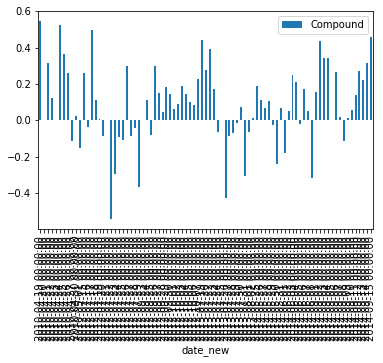

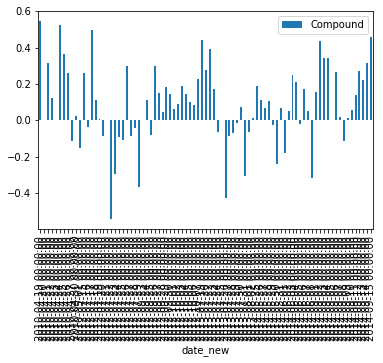

In [18]:
grouped = merged.groupby(['date_new'])
grouped.mean().reset_index().plot.bar("date_new", "Compound")
plt.savefig('aaronberry.png')
plt.show()